Martina Carretta (1673930), Meritxell Carvajal (1671647)

## Import libraries, util functions and test image loading



In [1]:
#!pip install imutils
import cv2
import urllib3
import numpy as np

from PIL import Image

import imutils
from matplotlib import pyplot as plt

# Block 2. Non-Linear Filtering and Morphological operations.

While linear filters can be effective for certain tasks, they often come with limitations when dealing with specific types of noise or when aiming to achieve certain effects on the image.

### Objectives:

1. **Median Filter Implementation**:
 Implement the median filter and understand its significance in noise removal.

2. **Defect detection with morphological operations**:
 Implement the basic morphological operations of dilation and erosion. Then implement the derived operations from these basics. After all this, propose pipelines to detect precisely the defects on some images.

3. **Watermarking**:
 Propose a pipeline for image watermarking using any of the previous techniques (Linear filtering, Non-linear filtering, Fourier transform, Morphological operations).

4. **Watermark extraction challenge (extra points)**
 Given three images with embedded watermarks of varying complexity levels, employ a combination of techniques seen in the course (image enhancing, linear filtering, non-linear filtering, morphological operations, and Fourier analysis) to extract the watermarks.
 You should obtain the binary mask with legible watermark for each image.

 ***Note***: The Challenge Exercise can augment your total grade **for up to 2 points**. For example, if you score 6 on this lab and complete the challenge, your score will be boosted up to 2 points, depending on the solution (0.5 easy; 0.5 medium; 1 hard). The total lab grade remains capped at 10 points.

---

### Mandatory Questions:

- How does the median filter differ in functionality from the mean filter, and under what circumstances is it preferable to use it?
- Describe how a median filter works in the spatial domain.
- How does the window size of the median filter affect the output image?
- Can a median filter be implemented as a convolution operation? Explain why or why not.
- What are the basic morphological operations? Describe dilation and erosion in terms of structuring elements.
- How do morphological operations change the shape and size of objects in an image?
- What are some common derived morphological operations and where they are used for?
- What is the purpose of watermarking in image processing?
- What is the difference between visible and invisible watermarks?
- How could you utilize Fourier Transform for watermark embedding?


### Optional Deep Dive Questions:

- Beyond noise removal, can you think of any other applications where the median filter might be advantageous?
- Compare the computational complexity of median filtering with Gaussian filtering.
- Describe the process of top-hat and bottom-hat filtering. How can they be used for defect detection?
- Can morphological operations be applied to multi-channel images? Discuss the challenges.
- Discuss the concept of "hit-or-miss" transform in morphological operations. How can it be useful in defect detection?
- Explore the concept of morphological gradients. How can they be derived from the basic operations of erosion and dilation?
- In watermark extraction, are there any other techniques or methods (beyond the scope of this course) that might aid in making the extraction process more efficient or accurate? Research and discuss.
- Explore more robust watermarking and the techniques.

## Median filter

#### Objective:
Implement the median filter operation by hand and compare with linear blur filters.

---

#### Guideline:
1. Implement a function to perform the median filters over an image. Make sure to handle edge cases and allow for different kernel sizes. DO NOT USE LIBRARY IMPLEMENTATIONS.
2. Experiment with different kernel sizes and apply on various images.
3. Add different quantities of noise and analyze when an image is not recoverable.
4. Compare your hand-implemented method with libraries implementation.
5. Finally compare the median filter to the linear filter counterparts (gaussian / box filters) in order to explain how they differ.
---

#### Expected results:
- Your hand-implemented median filter.
- Qualitative comparison on different blurs

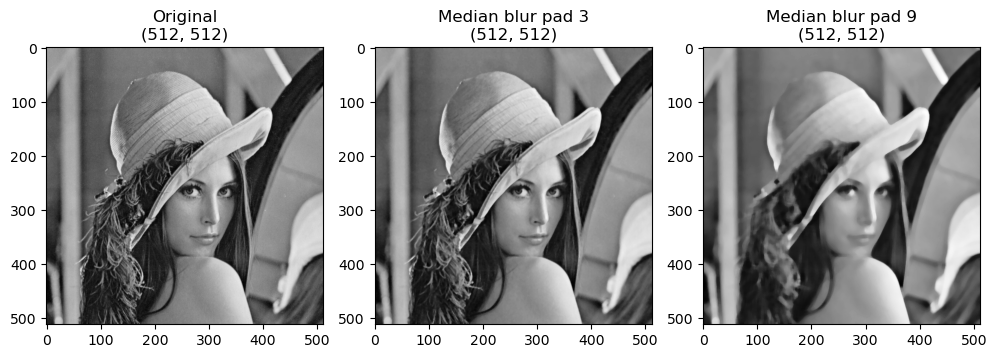

In [2]:
def median_blur(image, kernel_size):
    padded = cv2.copyMakeBorder(src=image, top=kernel_size//2, bottom=kernel_size//2, left=kernel_size//2, right=kernel_size//2, borderType=cv2.BORDER_REPLICATE) 
    output = np.zeros((image.shape[0], image.shape[1]))
    for i in range(kernel_size//2, image.shape[0] + kernel_size//2):
        for j in range(kernel_size//2, image.shape[1] + kernel_size//2):
            window = padded[i-kernel_size//2:i+kernel_size//2 + 1, j-kernel_size//2:j+kernel_size//2 + 1]
            
            median_value = np.median(window)
            output[i-kernel_size//2][j-kernel_size//2] = median_value
            output2 = output.astype(int)
    return output2

img = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/lenna.png")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output = median_blur(gray_image, 3)
output2 = median_blur(gray_image, 9)

fig, axes = plt.subplots(1, 3, figsize = (10,6))
axes[0].imshow(gray_image, cmap="gray")
axes[0].set_title("Original\n" + str(gray_image.shape))
axes[1].imshow(output, cmap="gray")
axes[1].set_title("Median blur pad 3\n" + str(output.shape))
axes[2].imshow(output2, cmap="gray")
axes[2].set_title("Median blur pad 9\n" + str(output.shape))

plt.tight_layout()
plt.show()

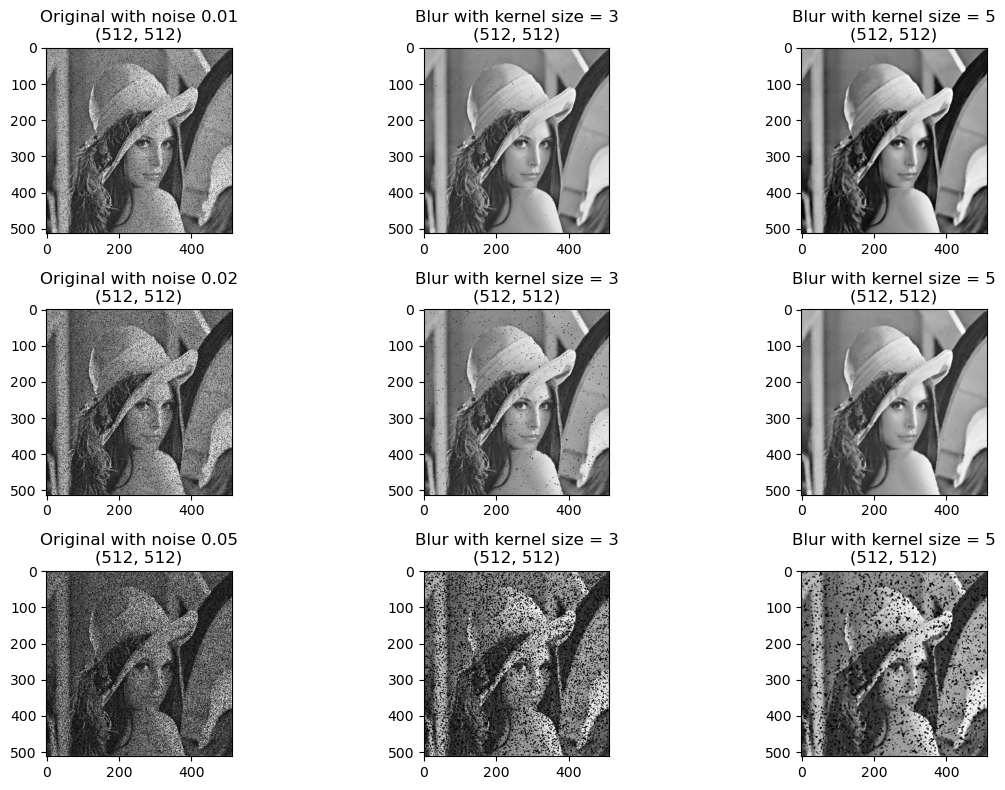

In [3]:
# Add noise (salt and pepper) the more amount of noise, the higher the size of the kernel it needs to be
def add_noise(image, noise_type, mean=0, std=0.01, amount=0.05, salt=0.5): # Function from lab 1
    if noise_type == 'gaussian':
        sigma = std**0.5
        noise = np.random.normal(mean, sigma, image.shape).astype(image.dtype)
        noisy_image = cv2.add(image, noise)
    elif noise_type == 'salt_pepper':
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * salt)
        coords = [np.random.randint(0, i-1, int(num_salt)) for i in image.shape]
        out[tuple(coords)] = 1
        # Pepper mode
        num_pepper = np.ceil(amount*image.size*(1. - salt))
        coords = [np.random.randint(0, i-1, int(num_pepper)) for i in image.shape]
        out[tuple(coords)] = 0
        noisy_image = out
    elif noise_type == 'speckle':
        noise = np.random.randn(*image.shape).astype(image.dtype)
        noisy_image = image + image * noise
    else:
        raise ValueError(f"Noise type '{noise_type}' is not supported.")
    # Clip values to be in [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

noisy1 = add_noise (gray_image, "salt_pepper", 0, 0.01, 0.1, 0.5)
noisy2 = add_noise (gray_image, "salt_pepper", 0, 0.01, 0.2, 0.5)
noisy3 = add_noise (gray_image, "salt_pepper", 0, 0.01, 0.5, 0.5)

noisy1_blur = median_blur(noisy1, 3)
noisy2_blur = median_blur(noisy2, 3)
noisy3_blur = median_blur(noisy3, 3)

noisy1_blur2 = median_blur(noisy1, 5)
noisy2_blur2 = median_blur(noisy2, 5)
noisy3_blur2 = median_blur(noisy3, 5)

fig, axes = plt.subplots(3, 3, figsize = (12, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.3)
axes[0][0].imshow(noisy1, cmap="gray")
axes[0][0].set_title("Original with noise 0.01\n" + str(noisy1.shape))
axes[0][1].imshow(noisy1_blur, cmap="gray")
axes[0][1].set_title("Blur with kernel size = 3\n" + str(noisy1_blur.shape))
axes[0][2].imshow(noisy1_blur2, cmap="gray")
axes[0][2].set_title("Blur with kernel size = 5\n" + str(noisy1_blur2.shape))

axes[1][0].imshow(noisy2, cmap="gray")
axes[1][0].set_title("Original with noise 0.02\n" + str(noisy2.shape))
axes[1][1].imshow(noisy2_blur, cmap="gray")
axes[1][1].set_title("Blur with kernel size = 3\n" + str(noisy2_blur.shape))
axes[1][2].imshow(noisy2_blur2, cmap="gray")
axes[1][2].set_title("Blur with kernel size = 5\n" + str(noisy2_blur2.shape))

axes[2][0].imshow(noisy3, cmap="gray")
axes[2][0].set_title("Original with noise 0.05\n" + str(noisy3.shape))
axes[2][1].imshow(noisy3_blur, cmap="gray")
axes[2][1].set_title("Blur with kernel size = 3\n" + str(noisy3_blur.shape))
axes[2][2].imshow(noisy3_blur2, cmap="gray")
axes[2][2].set_title("Blur with kernel size = 5\n" + str(noisy3_blur2.shape))

plt.tight_layout()
plt.show()

In [4]:
blur = cv2.medianBlur(gray_image, 3)
assert np.allclose (output , blur), "mismatch"

In [5]:
# Gaussian and box filters
def gaussian_blur(image, kernel_size, sigma):
    output = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return output

def box_blur_opencv(image, kernel_size):
    output = cv2.boxFilter(image, ddepth=-1, ksize=(kernel_size, kernel_size))
    return output

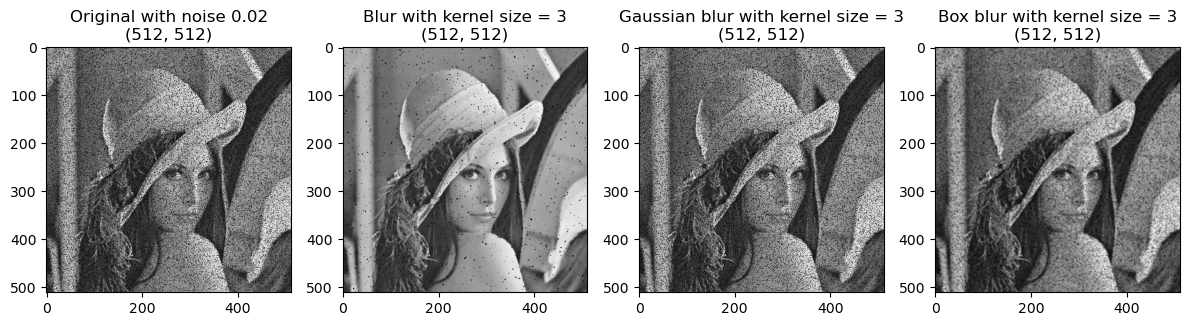

In [13]:
# We use noisy 2
# Compute the other 2 blurs
gaussian = gaussian_blur(noisy2, 3, 0.01) # Sigma is the same as the one we used to add the noise. 
box = box_blur_opencv(noisy2, 3)

# Plot
fig, axes = plt.subplots(1, 4, figsize = (12, 6))
axes[0].imshow(noisy2, cmap="gray")
axes[0].set_title("Original with noise 0.02\n" + str(noisy2.shape))
axes[1].imshow(noisy2_blur, cmap="gray")
axes[1].set_title("Blur with kernel size = 3\n" + str(noisy2_blur.shape)) # My function and kernel 3
axes[2].imshow(gaussian, cmap="gray")
axes[2].set_title("Gaussian blur with kernel size = 3\n" + str(gaussian.shape))
axes[3].imshow(box, cmap="gray")
axes[3].set_title("Box blur with kernel size = 3\n" + str(box.shape))
plt.tight_layout()
plt.show()

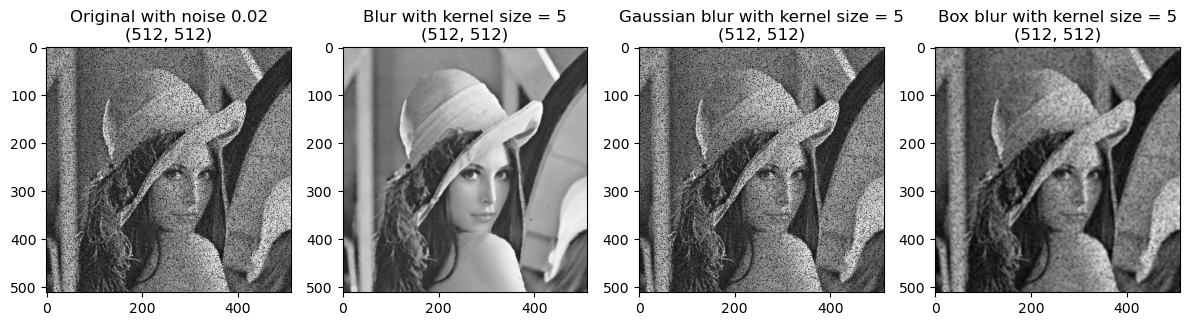

In [14]:
# We use noisy 2
# Compute the other 2 blurs
gaussian = gaussian_blur(noisy2, 5, 0.01) # Sigma is the same as the one we used to add the noise. 
box = box_blur_opencv(noisy2, 5)

# Plot
fig, axes = plt.subplots(1, 4, figsize = (12, 6))
axes[0].imshow(noisy2, cmap="gray")
axes[0].set_title("Original with noise 0.02\n" + str(noisy2.shape))
axes[1].imshow(noisy2_blur2, cmap="gray")
axes[1].set_title("Blur with kernel size = 5\n" + str(noisy2_blur2.shape)) # My function and kernel 3
axes[2].imshow(gaussian, cmap="gray")
axes[2].set_title("Gaussian blur with kernel size = 5\n" + str(gaussian.shape))
axes[3].imshow(box, cmap="gray")
axes[3].set_title("Box blur with kernel size = 5\n" + str(box.shape))
plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------------------------------
Comparation: Between the gaussian and the box filter, Gaussian works slightly better but neither has
results that can be compared to the median blur.

-----------------------------------------------------------------------------------------------------------


## Morphological operators



#### Objective:
Implement the basic morphological operators seen in class and prove their properties.

Basic morphological operators:
 - Dilation
 - Erosion

Derived operations:   
 - Open
 - Close
 - Morphological gradient
 - Top hat (optional)
 - Bottom hat (optional)
 - Skeleton (optional)
 - Convex hull or perimeter (optional)

##### Prove each of the properties

- Translation Invariance (dilation and erosion)
- Anti-Extensive (Erosion)
- Extensive (Dilation)
- Idempotence (Open and Close)
- Monotonically increasing (dilation and erosion)

---

#### Guideline:
1. Implement a function to perform the erosion and dilation operations. DO NOT USE LIBRARY IMPLEMENTATIONS.
2. Implement the derived operations using the previous ones.
3. Apply different operators to dummy images and prove each of the properties of morphological operators.
4. Prove each one of the listed properties.

---

#### Expected results:
- Your hand-implemented functions for dilation, erosion, opening, closing & morphological gradient .
- Prove of each one of the properties (list them all). Prove it mathematically in the report or by examples (plot figures)
- Example of each operation on dummy images (design your owns using openCV)

In [7]:
def dilation(image, structuring_element):
    # Padding:
    pad = structuring_element.shape[0]//2
    padded = np.full((image.shape[0] + structuring_element.shape[0], image.shape[1] + structuring_element.shape[1]), 0)
    padded[pad:image.shape[0] + pad, pad:image.shape[1] + pad] = image
    
    # Creation of output
    output = np.full((image.shape[0], image.shape[1]), 0)
    
    # Get patch for each pixel
    for i in range(image.shape[0]):
        for j in range (image.shape[1]):
            # Get patch using structuring element
            patch = padded[i:i+structuring_element.shape[0], j:j+structuring_element.shape[1]]
            output[i, j] = np.max(patch[structuring_element == 1])
    return output

def erosion(image, structuring_element):
    # Padding:
    pad = structuring_element.shape[0]//2
    padded = np.full((image.shape[0] + structuring_element.shape[0], image.shape[1] + structuring_element.shape[1]), 255)
    padded[pad:image.shape[0] + pad, pad:image.shape[1] + pad] = image
    
    # Creation of output
    output = np.full((image.shape[0], image.shape[1]), 255)
    
    # Get patch for each pixel
    for i in range(image.shape[0]):
        for j in range (image.shape[1]):
            # Get patch using structuring element
            patch = padded[i:i+structuring_element.shape[0], j:j+structuring_element.shape[1]]
            output[i, j] = np.min(patch[structuring_element == 1])
    return output

def opening(image, structuring_element):
    eroded = erosion(image, structuring_element)
    opened_img = dilation(eroded, structuring_element)
    return opened_img

def closing(image, structuring_element):
    dilated = dilation(image, structuring_element)
    closed_img = erosion(dilated, structuring_element)
    return closed_img

def top_hat(image, structuring_element):
    opened = opening(image, structuring_element)
    top_hat_img = image - opened
    return top_hat_img

def bottom_hat(image, structuring_element):
    closed = closing(image, structuring_element)
    bottom_hat_img = closed - image
    return bottom_hat_img

def morphological_gradient(image, structuring_element):
    # Apply dilation to the image
    dilated = dilation(image, structuring_element)
    # Apply erosion to the image
    eroded = erosion(image, structuring_element)
    # Calculate the morphological gradient by subtracting erosion from dilation
    gradient = dilated - eroded
    return gradient

def convex_hull(image):
    pass

def skeletonize(image, connectivity=8):
    # Define 'struct_element' based on connectivity
    if connectivity == 4:
        struct_element = np.array([[0, 1, 0],
                                   [1, 1, 1],
                                   [0, 1, 0]], dtype=np.uint8)
    elif connectivity == 8:
        struct_element = np.array([[1, 1, 1],
                                   [1, 1, 1],
                                   [1, 1, 1]], dtype=np.uint8)
    else:
        raise ValueError("Connectivity should be either 4 or 8.")

    # Define 'skeleton' as an empty array
    output = np.full((image.shape[0], image.shape[1]),0)
    # Iterate until convergence (image is fully eroded)
    while True:
        # Erode the image by 'struct_element'
        eroded = erosion(image, struct_element)
        # Subtract the image from the opened image (Top-Hat)
        tophat = top_hat(image, struct_element)
        # Add new elements (bitwise_OR) to the skeleton
        output = cv2.bitwise_or(tophat, output)
        # Update the image with the eroded one for the next iteration
        image = eroded
        # Check for convergence (if the eroded image is all zeros)
        if np.sum(image) == 0:
            break

    return output

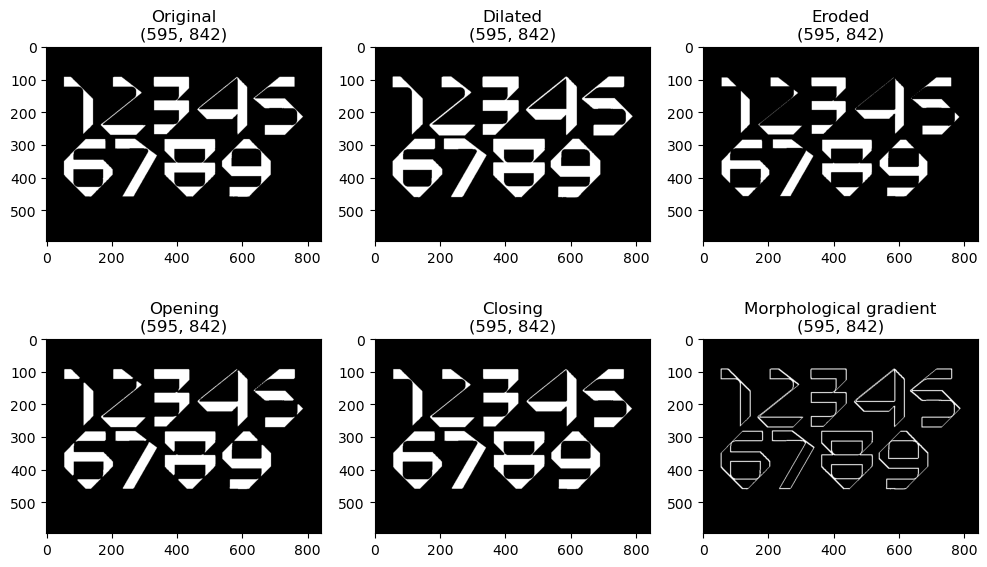

In [33]:
img = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/numbers.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, gray_img = cv2.threshold(gray, 127, 255, 0)

structuring_element = np.array([[0, 0, 0, 1, 0], 
                                [0, 0, 1, 0, 0],
                                [0, 1, 1, 1, 0],
                                [1, 0, 1, 0, 0],
                                [0, 0, 0, 0, 0]])
structuring_element = structuring_element.astype(np.uint8)

dilated_img = dilation (gray_img, structuring_element)
eroded_img = erosion (gray_img, structuring_element)

opened_img = opening (gray_img, structuring_element)
closed_img = closing (gray_img, structuring_element)

gradient = morphological_gradient (gray_img, structuring_element)

fig, axes = plt.subplots(2, 3, figsize = (10,6))
axes[0][0].imshow(gray_img, cmap="gray")
axes[0][0].set_title("Original\n" + str(gray_img.shape))

axes[0][1].imshow(dilated_img, cmap="gray")
axes[0][1].set_title("Dilated\n" + str(dilated_img.shape))

axes[0][2].imshow(eroded_img, cmap="gray")
axes[0][2].set_title("Eroded\n" + str(eroded_img.shape))

axes[1][0].imshow(opened_img, cmap="gray")
axes[1][0].set_title("Opening\n" + str(opened_img.shape))

axes[1][1].imshow(closed_img, cmap="gray")
axes[1][1].set_title("Closing\n" + str(closed_img.shape))

axes[1][2].imshow(gradient, cmap="gray")
axes[1][2].set_title("Morphological gradient\n" + str(closed_img.shape))

plt.tight_layout()
plt.show()

In [34]:
# To check if they are correctly computed, i compare them with the cv2 existing functions. 
a = cv2.erode(gray_img, structuring_element)
b = cv2.dilate(gray_img, structuring_element)
c = cv2.morphologyEx(gray_img, cv2.MORPH_OPEN, structuring_element)
d = cv2.morphologyEx(gray_img, cv2.MORPH_CLOSE, structuring_element)
e = cv2.morphologyEx(gray_img, cv2.MORPH_GRADIENT, structuring_element)
assert np.allclose (eroded_img , a), "mismatch"
assert np.allclose (dilated_img , b), "mismatch"
assert np.allclose (opened_img , c), "mismatch"
assert np.allclose (closed_img , d), "mismatch"
assert np.allclose (gradient , e), "mismatch"

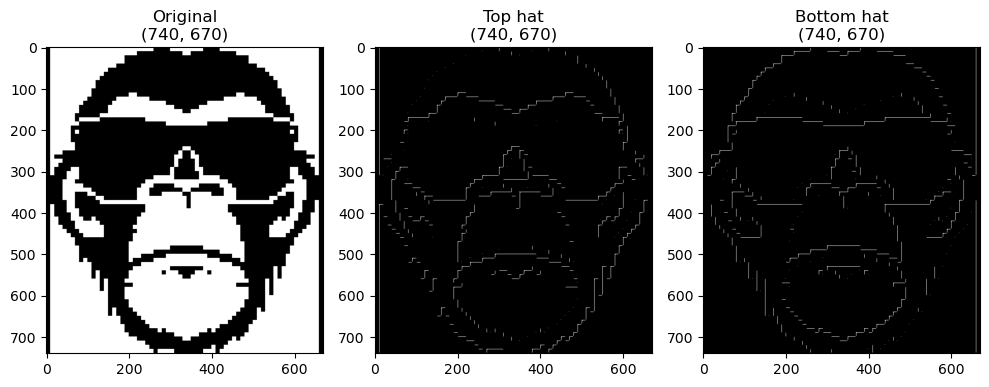

In [35]:
img2 = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/hat.png")
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, hat = cv2.threshold(gray, 200, 1, cv2.THRESH_BINARY)

top = top_hat (hat, structuring_element)
bottom = bottom_hat (hat, structuring_element)

top = top.astype(np.float32)
bottom = bottom.astype(np.float32)
ret, top_binary = cv2.threshold(top, 0.5, 1, cv2.THRESH_BINARY)
ret, bottom_binary = cv2.threshold(bottom, 0.5, 1, cv2.THRESH_BINARY)

fig, axes = plt.subplots(1, 3, figsize = (10, 6))
axes[0].imshow(hat, cmap="gray")
axes[0].set_title("Original\n" + str(hat.shape))

axes[1].imshow(top_binary, cmap="gray")
axes[1].set_title("Top hat\n" + str(top_binary.shape))

axes[2].imshow(bottom_binary, cmap="gray")
axes[2].set_title("Bottom hat\n" + str(bottom_binary.shape))

plt.tight_layout()
plt.show()

In [36]:
f = cv2.morphologyEx(hat, cv2.MORPH_TOPHAT, structuring_element)
g = cv2.morphologyEx(hat, cv2.MORPH_BLACKHAT, structuring_element)
assert np.allclose (top_binary , f), "mismatch"
assert np.allclose (bottom_binary , g), "mismatch"

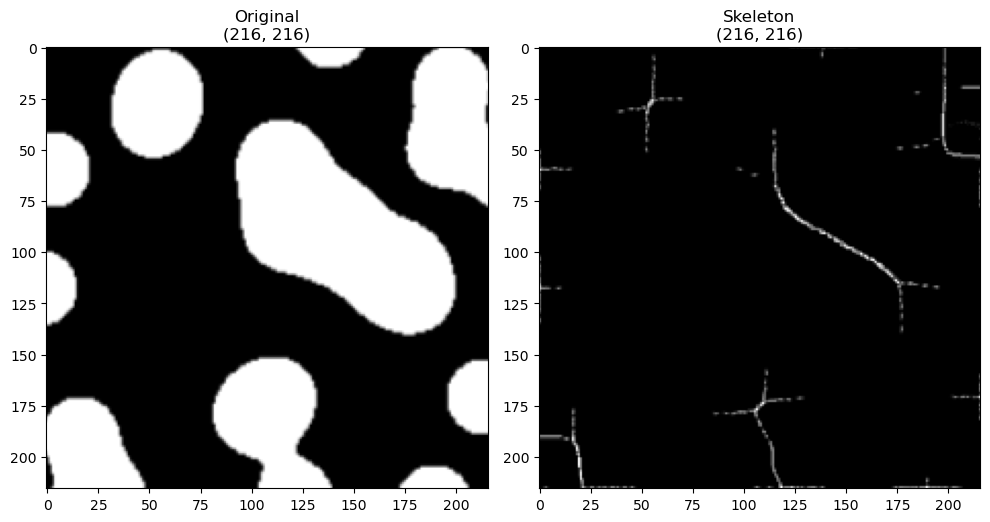

In [327]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))
img1 = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/sphx_glr_plot_skeleton_002.png")
skel_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
skel = skeletonize (skel_gray)

axes[0].imshow(skel_gray, cmap="gray")
axes[0].set_title("Original\n" + str(skel_gray.shape))

axes[1].imshow(skel, cmap="gray")
axes[1].set_title("Skeleton\n" + str(skel.shape))

plt.tight_layout()
plt.show()

In [328]:
print ("PROOF FOR EACH PROPERTIES: ")
# (for the purpose of the exercise, i will directly create easy little arrays so the code is executed quickly)

# Translation Invariance (dilation and erosion)
# Applying the operation to an image is equivalent to applying it to a translated version of the image.

# Define an image and a structuring element
image = np.array([[0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 0],
                  [0, 1, 1, 1, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0]], dtype=np.uint8)

struct_el = np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]], dtype=np.uint8)

# Perform dilation and erosion on A
dilated_image = dilation(image, struct_el)
eroded_image = erosion(image, struct_el)

# Perform translation on A and perform dilation and erosion on A'
x, y = 2, 2  # Translation vector
#trans_image = shift(image, (x, y), cval=0)
trans_image = np.roll(struct_el, (x, y), axis=(0, 1)) # Shift kernel

dilated_trans_image = dilation(image, trans_image)
eroded_trans_image = erosion(image, trans_image)

# Check if the translated result is the same as applying dilation/erosion to the original image
if np.array_equal(dilated_image, dilated_trans_image):
    print("TRUE: Translation Invariance is true for dilation. ")
else:
    print("FALSE: Translation Invariance is not true for dilation. ")
if np.array_equal(eroded_image, eroded_trans_image):
    print("TRUE: Translation Invariance is true for erosion. ")
else:
    print("FALSE: Translation Invariance is not true for erosion. ")
    
#######################################################################################################################

# Anti-Extensive (Erosion)
# If the structuring element is increased, the result will always get smaller or stay the same.

# Define binary images and image_prime such that image is a subset of image_prime
image = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 0]], dtype=np.uint8)
image_prime = np.array([[0, 0, 0],
                        [0, 1, 0],
                        [0, 1, 0]], dtype=np.uint8)

# Define a structuring element
struct_el = np.array([[1, 1],
                      [1, 1]], dtype=np.uint8)

# Erosion of image and image_prime with struct_el
eroded_image = erosion (image, struct_el)
eroded_image_prime = erosion (image_prime, struct_el)

# Check if erosion is anti-extensive (eroded_image is a subset of eroded_image_prime)
if (eroded_image <= eroded_image_prime).all():
    print("TRUE: Anti-Extensive property is true for erosion.")
else:
    print("FALSE: Anti-Extensive property is not true for erosion.")

#######################################################################################################################

# Extensive (Dilation)
# If the structuring element is increased, the result will always get larger or stay the same.
    # Dilation of A with B: (A ⊕ B)
    # Dilation of A' with B: (A' ⊕ B) = (A + (x, y)) ⊕ B
# Define binary image and image_prime such that image is a subset of image_prime
image = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 0]], dtype=np.uint8)
image_prime = np.array([[0, 0, 0],
                        [0, 1, 0],
                        [0, 1, 0]], dtype=np.uint8)

# Define a structuring element
struct_el = np.array([[1, 1],
                      [1, 1]], dtype=np.uint8)

# Dilation of image and image_prime with struct_el
dilated_image = dilation(image, struct_el)
dilated_image_prime = dilation(image_prime, struct_el)

# Check if dilation is extensive (dilated_A is a subset of dilated_A')
if (dilated_image <= dilated_image_prime).all():
    print("TRUE: Extensive property is true for dilation.")
else:
    print("FALSE: Extensive property is not true for dilation.")

#######################################################################################################################

# Idempotence (Open and Close)
# Applying an operation to an image multiple times doesn't change the result after the first application.
    # Open operation: (A ○ B) ○ B = A ○ B (since erosion is idempotent)
    # Close operation: (A ● B) ● B = A ● B (since dilation is idempotent)
# Define a binary image and a structuring element
image = np.array([[0, 1, 1, 0],
                  [1, 1, 1, 1],
                  [1, 1, 1, 1],
                  [0, 1, 1, 0]], dtype=np.uint8)
struct_el = np.array([[0, 1, 0],
                      [1, 1, 1], 
                      [0, 1, 0]], dtype=np.uint8)

# Perform open and close operations
opened_image = opening (image, struct_el)
closed_image = closing (image, struct_el)

# Apply open and close operations again
double_opened_image = opening (opened_image, struct_el)
double_closed_image = closing (closed_image, struct_el)

# Check if open and close operations are idempotent
if np.array_equal(opened_image, double_opened_image):
    print("TRUE: Idempotence true for open. ")
else:
    print("FALSE: Idempotence is not true for open.")
if np.array_equal(closed_image, double_closed_image):
    print("TRUE: Idempotence true for close. ")
else:
    print("FALSE: Idempotence is not true for close.")
    
#######################################################################################################################

# Monotonically increasing (dilation and erosion)
# if an image is changed to include more "on" pixels (i.e., 1s), the result will contain at least as many "on" pixels.
# Define binary images and image_prime such that image is a subset of image_prime again
image = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 0]], dtype=np.uint8)
image_prime = np.array([[0, 0, 0],
                        [0, 1, 1],
                        [0, 1, 1]], dtype=np.uint8)

# Define a structuring element
struct_el = np.array([[1, 1],
                      [1, 1]], dtype=np.uint8)

# Erosion of image and image_prime
eroded_image = erosion (image, struct_el)
eroded_image_prime = erosion (image_prime, struct_el)

# Check if erosion is monotonically increasing (eroded_A is a subset of eroded_A')
if (eroded_image <= eroded_image_prime).all():
    print("TRUE: Monotonically Increasing property is true for erosion.")
else:
    print("FALSE: Monotonically Increasing property is not true for erosion.")

PROOF FOR EACH PROPERTIES: 
TRUE: Translation Invariance is true for dilation. 
TRUE: Translation Invariance is true for erosion. 
TRUE: Anti-Extensive property is true for erosion.
TRUE: Extensive property is true for dilation.
TRUE: Idempotence true for open. 
TRUE: Idempotence true for close. 
TRUE: Monotonically Increasing property is true for erosion.


## Defect detection with Morphological operations


#### Objective:

Implement a pipeline for defect detection in a folder containing images. The pipelines should aim to obtain segmentation masks specifically on the defects using various image processing techniques seen in this course, focusing morphological operations.

---

#### Guideline:
- Inspect the images in the folder ```defects``` and identify the nature of defects.
- Design separate pipelines for different types of defects.
- For each pipeline, apply morphological operations and other techniques discussed in the course to isolate the defect and generate a segmentation mask.
- Evaluate the quality of the segmentation masks against ground truth using Intersection over Union (IoU) as a metric.

---

#### Expected results:
- Individual pipelines designed for each type of defect.
- Qualitative analysis showcasing the effectiveness of your pipeline in isolating defects.
- Quantitative analysis providing IoU scores for each pipeline when compared to ground truth masks in the same folder.

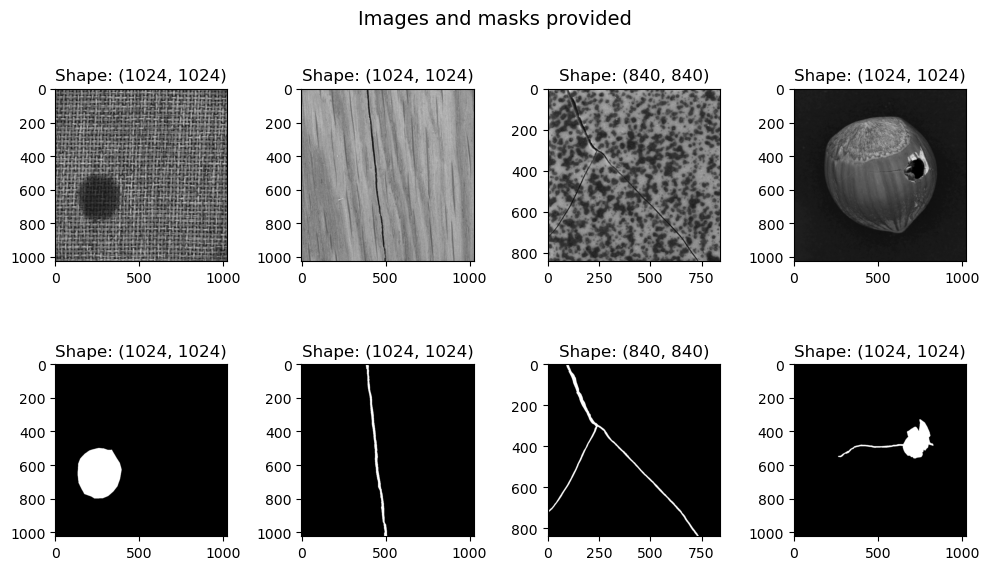

In [62]:
# Load images
i0 = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/defect/000.png", 0)
i1 = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/defect/000_mask.png", 0)
i2 = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/defect/005.png", 0)
i3 = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/defect/005_mask.png", 0)
i4 = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/defect/013.png", 0)
i5 = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/defect/013_mask.png", 0)
i6 = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/defect/014.png", 0)
i7 = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/defect/014_mask.png", 0)

images = [i0, i2, i4, i6, i1, i3, i5, i7]
fig, axes = plt.subplots(2, 4, figsize = (10, 6))
index = 0
for i in range (2):
    for j in range (4):
        axes[i][j].imshow(images[index], cmap = "gray")        
        axes[i][j].set_title(f"Shape: {images[index].shape}")
        index += 1
fig.suptitle("Images and masks provided", fontsize=14)
plt.tight_layout()
plt.show()

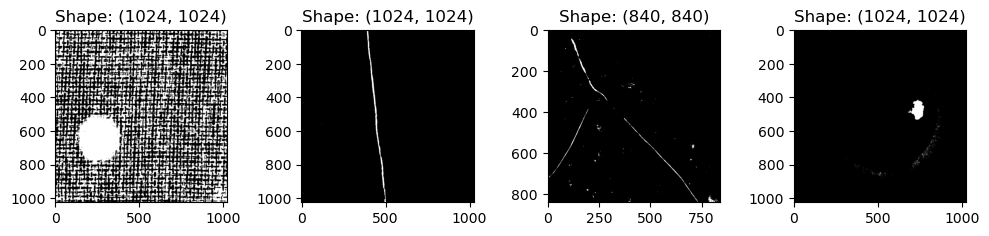

In [57]:
def identify_defects(image, threshold):
    _, binary_mask = cv2.threshold(image, threshold, 1, cv2.THRESH_BINARY) #+ cv2.THRESH_OTSU
    inverted_mask = 1 - binary_mask
    return inverted_mask

# Step 1: Identify defects
defect_mask1 = identify_defects(i0, 80)
defect_mask2 = identify_defects(i2, 60)
defect_mask3 = identify_defects(i4, 50)
defect_mask4 = identify_defects(i6, 32)

defect_masks = [defect_mask1, defect_mask2, defect_mask3, defect_mask4]

fig, axes = plt.subplots(1, 4, figsize = (10, 6))
for i in range (4):
    axes[i].imshow(defect_masks[i], cmap = "gray")        
    axes[i].set_title(f"Shape: {defect_masks[i].shape}")

plt.tight_layout()
plt.show()

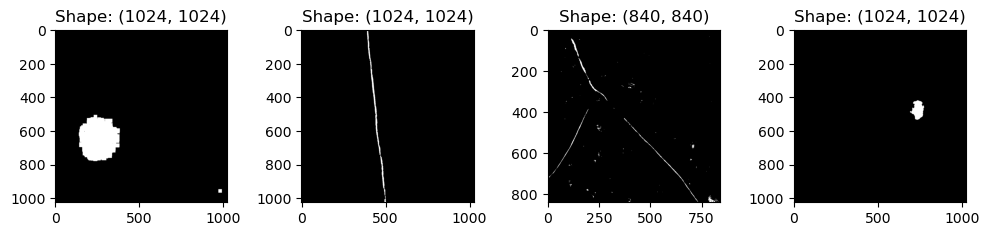

In [71]:
kernel1 = np.full((21, 21),1)
kernel2 = np.full((3,3),1)
kernel3 = np.full((1,1),1)
kernel4 = np.full((5,5),1)

defect1 = opening(defect_mask1, kernel1)
defect2 = opening(defect_mask5, kernel2)
defect3 = opening(defect_mask13, kernel3)
defect4 = opening(defect_mask14, kernel4)

defects = [defect1, defect2, defect3, defect4]
    
fig, axes = plt.subplots(1, 4, figsize = (10, 6))
for i in range (4):
    axes[i].imshow(defects[i], cmap = "gray")        
    axes[i].set_title(f"Shape: {defects[i].shape}")

plt.tight_layout()
plt.show()

In [72]:
def calculate_iou(prediction, ground_truth):
    # Calculate intersection and union
    intersection = np.logical_and(prediction, ground_truth)
    union = np.logical_or(prediction, ground_truth)
    
    # Calculate IoU
    iou = np.sum(intersection) / np.sum(union)
    
    return iou

for i in range (len(defects)):
    iou = calculate_iou(defects[i], images[i+4]) # images[i+4] because the masks start at index 4
    print(iou)

0.8156320059353881
0.5617385352498289
0.26266239879495384
0.2131671575317865


## Watermarking


#### Objective:
Use any of the previous techniques to apply a hard-to-removal watermark from to an image. After that you will try to reverse-engeneer your method and try to extract the text of the watermark you created.

---

#### Guideline:
1. Define a pipeline using the previous techniques (linear filtering, fourier transform, non-linear filtering, morphological operations, ...). You can use one or a combination of different techniques to produce a good pipeline.
2. Try to develop a method to extract the watermark (binary mask with the original watermark you introduced) by using the watermaked image and the original image.
3. Same as the previous one but relying only on the watermarked image. (You can't use the original image)
---

#### Expected results:
- A function that takes an image and a watermark (a binary image or a text) and returns the watermarked image.
- A pair of original image and the watermaked one
- A pair of a watermarked image and the watermark extracted (by using both original and watermaked image)
- A pair of a watermarked image and the watermark extracted (by using only the watermaked image)

In [15]:
from PIL import Image, ImageDraw, ImageFont

def apply_watermark(image_path, watermark):
    # Open the original image
    original_image = Image.open(image_path)
    width, height = original_image.size

    # Create output
    watermarked_image = Image.new("RGB", (width, height), (255, 255, 255))
    # Paste the original image onto the new image
    watermarked_image.paste(original_image, (0, 0))
    
    # Add text to image
    draw = ImageDraw.Draw(watermarked_image)
    font = ImageFont.truetype("arial.ttf", 40)
    text_bbox = draw.textbbox((0, 0), watermark, font=font)
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
    text_position = (300, 50)
    draw.text(text_position, watermark, fill=(255, 255, 255), font=font)

    # Save the watermarked image to the specified output path
    watermarked_image.save("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/output_image.jpg")
    return

def remove_watermark_easy(image_b, image_a):
    # Convert the images to grayscale
    image_a_gray = cv2.cvtColor(image_a, cv2.COLOR_BGR2GRAY)
    image_b_gray = cv2.cvtColor(image_b, cv2.COLOR_BGR2GRAY)

    # Subtract the two images to get the watermark
    watermark = cv2.absdiff(image_a_gray, image_b_gray)

    # Apply a threshold to the watermark (you may need to adjust the parameters here)
    _, watermark_thresh = cv2.threshold(watermark, 30, 255, cv2.THRESH_BINARY)

    return watermark_thresh

def remove_watermark_hard(watermarked_image):
    # Convert the watermarked image to grayscale
    img = cv2.cvtColor(watermarked_image, cv2.COLOR_BGR2GRAY)
    
    # Binary mask where we have white pixels (watermark)
    _, binary_mask = cv2.threshold(img, 233, 255, cv2.THRESH_BINARY)  
    
    # Create an array of ones (to then multiply by the mask)
    ones_array = np.ones_like(watermarked_image, dtype=np.uint8)

    # Multiply the ones_array by the binary_mask
    watermark = ones_array * binary_mask[:, :, np.newaxis] #np.newaxis is because we need a third dimension

    # Convert the resulting image back to grayscale with the correct amount of dimensions.
    watermark_gray = np.sum(watermark, axis=2)
    
    return watermark

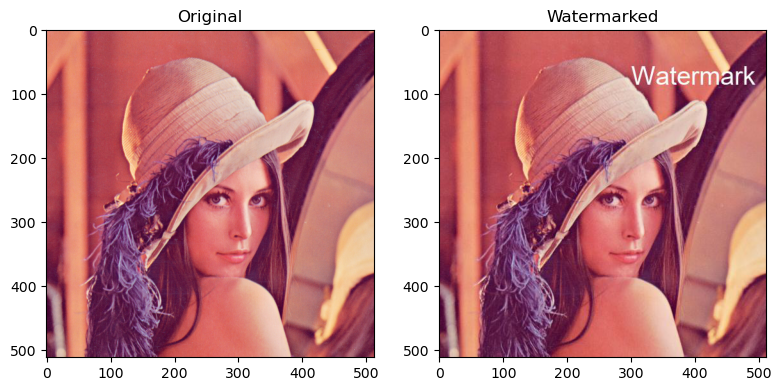

In [26]:
# Load image and convert to grayscale
og = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/lenna.png")
og_rgb = cv2.cvtColor(og, cv2.COLOR_BGR2RGB)

# Add the watermark and retrieve the result (and convert to grayscale)
apply_watermark("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/images/lenna.png", "Watermark")
img = cv2.imread("C:/Users/Momo/OneDrive/Escriptori/Computer vision/Lab 2/output_image.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize = (8, 6))
axes[0].imshow(og_rgb, cmap = "gray")        
axes[0].set_title("Original")
axes[1].imshow(img_rgb, cmap = "gray")        
axes[1].set_title("Watermarked")
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
plt.show()

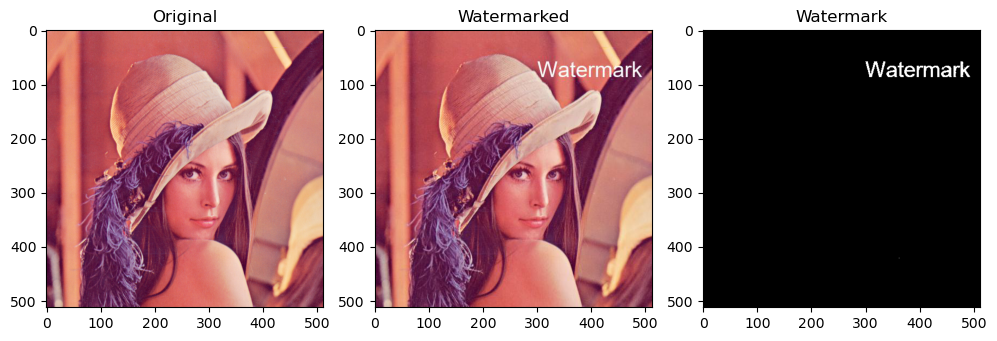

In [27]:
result = remove_watermark_easy(og, img)

fig, axes = plt.subplots(1, 3, figsize = (10, 6))
axes[0].imshow(og_rgb, cmap = "gray")        
axes[0].set_title("Original")
axes[1].imshow(img_rgb, cmap = "gray")        
axes[1].set_title("Watermarked")
axes[2].imshow(result, cmap = "gray")        
axes[2].set_title("Watermark")
plt.tight_layout()
plt.show()

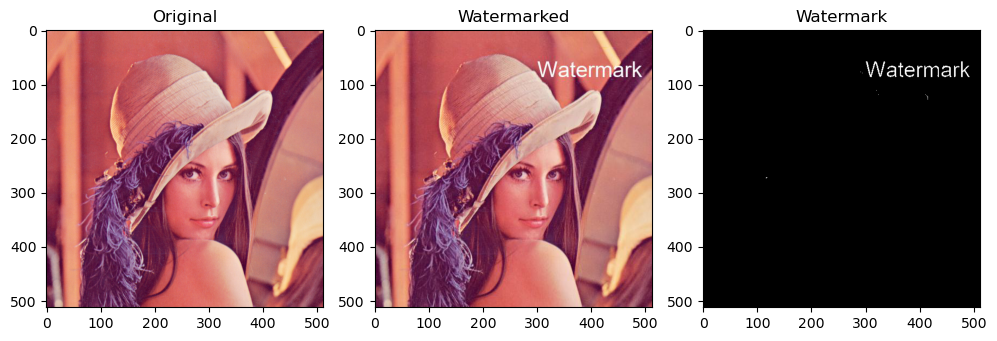

In [325]:
watermark = remove_watermark_hard (img)

fig, axes = plt.subplots(1, 3, figsize = (10, 6))  
axes[0].imshow(og_rgb, cmap = "gray")        
axes[0].set_title("Original")
axes[1].imshow(img_rgb, cmap = "gray")        
axes[1].set_title("Watermarked")
axes[2].imshow(watermark, cmap = "gray")        
axes[2].set_title("Watermark")
plt.tight_layout()
plt.show()

## Watermark extraction challenge


#### Objective:
Create a binary mask where you can read the text of the watermark hidden on images on folder ```lab2_challenge```.  
Remember that this challenge counts as extra part of the lab and do not count of the optional points of this lab, so there's no guideline. Instead there's a hint on each level you can use to start designing your own method.


---

#### Hints:
  - Hints for each image:
    - Easy: Will edges and some post-processing be enough?
    - Medium: Equalizing the image correclty could make watermark more visible
    - Hard: Do you think image looks wierd enough to check fourier spece?

---

#### Expected results:
- A binary image with the extracted text (or at least somewhat readable) and the string of text you extracted on each one.